In [112]:
import pandas as pd

player_dataset = pd.read_csv("./sources/fifa-23-player-dataset.csv", usecols=[
    "Best Position",
    "Height(in cm)",
    "Pace Total",
    "Shooting Total",
    "Passing Total",
    "Dribbling Total",
    "Defending Total",
    "Physicality Total",
    "Crossing",
    "Finishing",
    "Heading Accuracy",
    "Short Passing",
    "Volleys",
    "Dribbling",
    "Curve",
    "Freekick Accuracy",
    "Long Passing",
    "Ball Control",
    "Acceleration",
    "Sprint Speed",
    "Agility",
    "Reactions",
    "Balance",
    "Shot Power",
    "Jumping",
    "Stamina",
    "Strength",
    "Long Shots",
    "Aggression",
    "Interceptions",
    "Positioning",
    "Vision",
    "Penalties",
    "Composure",
    "Marking",
    "Standing Tackle",
    "Sliding Tackle",
    "Goalkeeper Diving",
    "Goalkeeper Handling",
    "Goalkeeper Kicking",
    "Goalkeeper Positioning",
    "Goalkeeper Reflexes",
])


In [104]:
player_dataset.head()

,Best Position,Height(in cm),Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,Crossing,Finishing,...,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,Goalkeeper Diving,Goalkeeper Handling,Goalkeeper Kicking,Goalkeeper Positioning,Goalkeeper Reflexes
0,CAM,169,81,89,90,94,34,64,84,90,...,75,96,20,35,24,6,11,15,14,8
1,CF,185,80,88,83,87,39,78,75,92,...,84,90,43,24,18,13,11,5,5,7
2,ST,185,75,91,79,86,44,83,71,94,...,90,88,35,42,19,15,6,12,8,10
3,CM,181,74,88,93,87,64,77,94,85,...,83,89,68,65,53,15,13,5,10,13
4,ST,182,97,89,80,92,36,76,78,93,...,80,88,26,34,32,13,5,7,11,6


In [105]:
from sklearn.model_selection import StratifiedShuffleSplit

split_data = StratifiedShuffleSplit(n_splits=1, train_size=0.8, test_size=0.2, random_state=42).split(player_dataset, player_dataset["Best Position"])

for train_index, test_index in split_data:

    strat_train_set = player_dataset.iloc[train_index]
    strat_test_set = player_dataset.iloc[test_index]

strat_train_set["Best Position"].value_counts() / len(strat_train_set)


Best Position
CB     0.197675
ST     0.138629
CAM    0.123797
GK     0.112102
RM     0.077729
CDM    0.076018
CM     0.059902
RB     0.049490
LB     0.046424
LM     0.041931
RWB    0.022677
LWB    0.021607
RW     0.016473
LW     0.011624
CF     0.003922
Name: count, dtype: float64

In [106]:
strat_train_set.drop("Best Position", axis=1, inplace=True)
strat_test_set.drop("Best Position", axis=1, inplace=True)
# This is an unsupervised learning problem, so we don't need the labels

C:\Users\HP\AppData\Local\Temp\ipykernel_25996\146425076.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strat_train_set.drop("Best Position", axis=1, inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_25996\146425076.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strat_test_set.drop("Best Position", axis=1, inplace=True)


In [107]:
from sklearn.cluster import KMeans

# Grouping players into 4 clusters for starters
model = KMeans(n_clusters=4, random_state=42, n_init="auto", init="k-means++", max_iter=100, verbose=1)
points = model.fit_transform(strat_train_set)

Initialization complete
Iteration 0, inertia 78963580.0.
Iteration 1, inertia 48147845.65428704.
Iteration 2, inertia 46912772.69558489.
Iteration 3, inertia 46241174.69226535.
Iteration 4, inertia 45889522.72459165.
Iteration 5, inertia 45686188.78351871.
Iteration 6, inertia 45579316.0318078.
Iteration 7, inertia 45532202.34904853.
Iteration 8, inertia 45507428.81250458.
Iteration 9, inertia 45495502.81220398.
Iteration 10, inertia 45491692.664426155.
Iteration 11, inertia 45490745.651762694.
Iteration 12, inertia 45490213.68718264.
Iteration 13, inertia 45490079.70740997.
Converged at iteration 13: center shift 0.002948139427087637 within tolerance 0.025526600961989887.


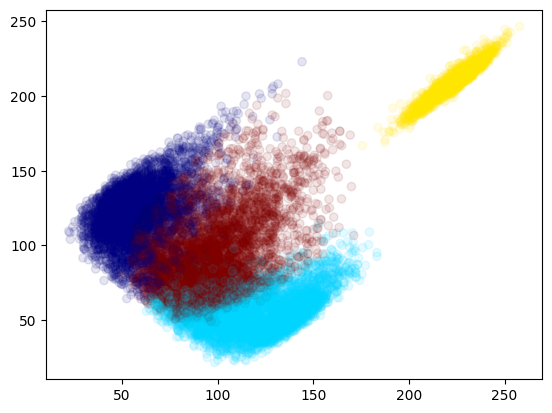

In [108]:
import matplotlib.pyplot as plt

plt.scatter(points[:, 0], points[:, 1], c=model.labels_, cmap="jet", alpha=0.1)

# From the results we can see well defined clusters emerge
# There is some overlap between players them with few outliers

In [109]:
model.labels_

array([0, 0, 2, ..., 0, 0, 2])

In [110]:
s_model = KMeans(n_clusters=14, random_state=42, n_init="auto", init="k-means++", max_iter=100, verbose=1)
# Try clssify into 14 positions
points = s_model.fit_transform(strat_train_set)

Initialization complete
Iteration 0, inertia 43456200.0.
Iteration 1, inertia 31370668.77436429.
Iteration 2, inertia 30368971.09964472.
Iteration 3, inertia 30000169.699595015.
Iteration 4, inertia 29835328.921525132.
Iteration 5, inertia 29714896.78930422.
Iteration 6, inertia 29632336.068179015.
Iteration 7, inertia 29578336.704157416.
Iteration 8, inertia 29541865.911552433.
Iteration 9, inertia 29515994.37573366.
Iteration 10, inertia 29495384.36254624.
Iteration 11, inertia 29474285.693351977.
Iteration 12, inertia 29458568.19322949.
Iteration 13, inertia 29446224.143125273.
Iteration 14, inertia 29436636.809470683.
Iteration 15, inertia 29428681.45312023.
Iteration 16, inertia 29422367.71389612.
Iteration 17, inertia 29416737.304965455.
Iteration 18, inertia 29410315.998113874.
Iteration 19, inertia 29400678.88570897.
Iteration 20, inertia 29392501.926971387.
Iteration 21, inertia 29386875.33321828.
Iteration 22, inertia 29382089.68450524.
Iteration 23, inertia 29378236.13974191

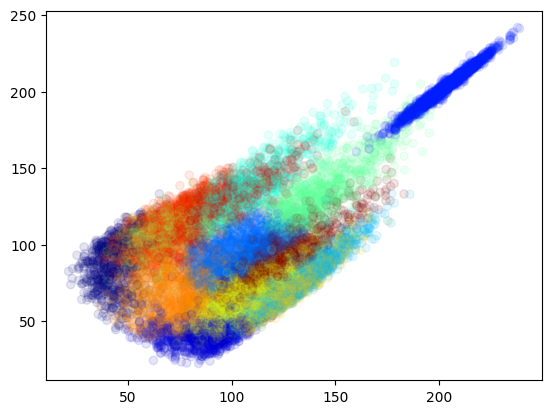

In [111]:
plt.scatter(points[:, 0], points[:, 1], c=s_model.labels_, cmap="jet", alpha=0.1)